# Метрические методы классификации и регрессии

## Библиотеки

In [136]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import math

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, LeaveOneOut, LeavePOut, ShuffleSplit, cross_val_score

from mlxtend.plotting import plot_decision_regions


## Датасет

In [3]:
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=3, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

## Метод ближайшего соседа

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)

In [ ]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])

plt.show()

## Метод k-ближайших соседей

In [ ]:
models = []
for n_neighbors in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()

## Метод k-ближайших соседей с линейно убывающими весами

In [ ]:
def func(distance):
    ret = np.ones_like(distance)
    k = ret.shape[1]
    for i in range(k):
        ret[:, i] *= (k-i)/k
    return ret

In [ ]:
models = []
for n_neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=n_neighbors, 
                                 weights=func)
    model.fit(X_train, Y_train)
    models.append(model)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()

## Метод окна Парзена

См. [метод парзеновского окна](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D0%B0%D1%80%D0%B7%D0%B5%D0%BD%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BE%D0%BA%D0%BD%D0%B0) на machinelearning.ru.

In [102]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [103]:
def K_silv(distance, k=3):
    pi = 3.14
    h = np.sort(distance)[:, k][:, None]
    ret = np.array(distance)/h
    sqrt_2 = math.sqrt(2)
    ret_abs = np.abs(ret)
    return 0.5 * np.exp(-ret_abs / sqrt_2) * np.sin((ret_abs / sqrt_2) + pi / 4)

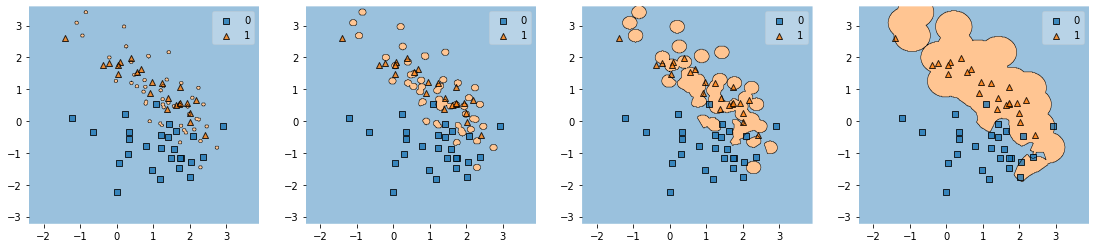

In [104]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

Количество итераций lpo:  1225
Средняя для lpo: 0.95
На тестах: 0.92
Количество итераций lpo:  1225
Средняя для lpo: 0.95
На тестах: 0.92
Количество итераций lpo:  1225
Средняя для lpo: 0.95
На тестах: 0.92
Количество итераций lpo:  1225
Средняя для lpo: 0.95
На тестах: 0.92
Количество итераций lpo:  1225
Средняя для lpo: 0.95
На тестах: 0.92
best 42


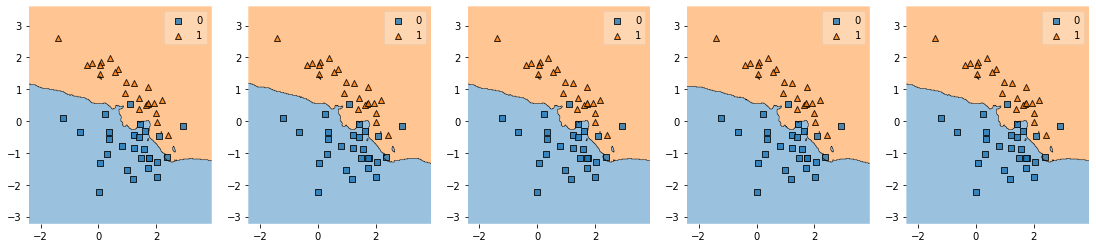

In [133]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 5)

ax = []
lpo = LeavePOut(2)
sc = []
h = 41
mm = 1000000000
for i in range(0, 5):
    model = KNeighborsClassifier(n_neighbors=h,
                                 weights=lambda x: K_silv(x))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])
    scores = cross_val_score(model, X_test, Y_test, cv=lpo)
    print("Количество итераций lpo: ", len(scores))
    print("Средняя для lpo: {:.2f}".format(scores.mean()))
    sc.append((h, scores.mean()))
    print("На тестах: {:.2f}".format(model.score(X_test, Y_test))) 
    if scores.mean() < mm:
        mm = scores.mean()
        h += 1
    else:
        h -= 1

pos = 0
maxi = sc[0][1]
for i in range(len(sc)):
    if sc[i][1] > maxi:
        maxi=sc[i][1]
        pos=i
print("best " + str(sc[pos][0]))
plt.show()

best 25


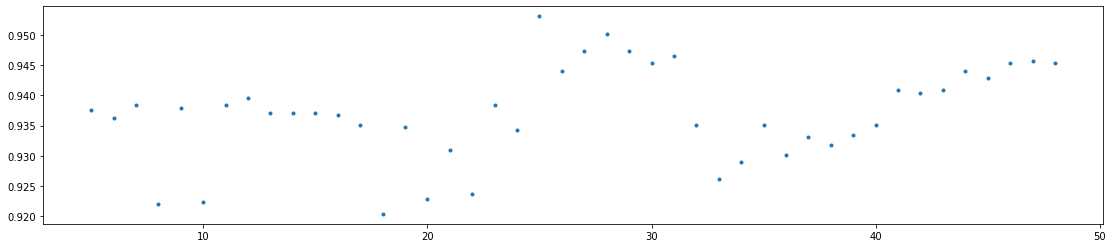

In [114]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 1)

ax = []
lpo = LeavePOut(2)
sc = []
h = 5
while(True):
    model = KNeighborsClassifier(n_neighbors=h,
                                 weights=lambda x: K_silv(x))
    model.fit(X_train, Y_train)
    scores = cross_val_score(model, X_test, Y_test, cv=lpo)
    sc.append((h, scores.mean())) 
    h += 1
    if h > 48:
        break

pos = 0
maxi = sc[0][1]
xs, ys = [], []
for i in range(len(sc)):
    xs.append(sc[i][0])
    ys.append(sc[i][1])
    if sc[i][1] > maxi:
        maxi=sc[i][1]
        pos=i
print("best " + str(sc[pos][0]))
ax.append(fig.add_subplot(gs[0]))
plt.plot(xs, ys, '.')
plt.show()

Количество итераций ShuffleSplit:  10
Средняя для ShuffleSplit: 0.94
На тестах: 0.92
Количество итераций ShuffleSplit:  10
Средняя для ShuffleSplit: 0.96
На тестах: 0.92
Количество итераций ShuffleSplit:  10
Средняя для ShuffleSplit: 0.90
На тестах: 0.92
Количество итераций ShuffleSplit:  10
Средняя для ShuffleSplit: 0.92
На тестах: 0.92
Количество итераций ShuffleSplit:  10
Средняя для ShuffleSplit: 0.88
На тестах: 0.92
best 40


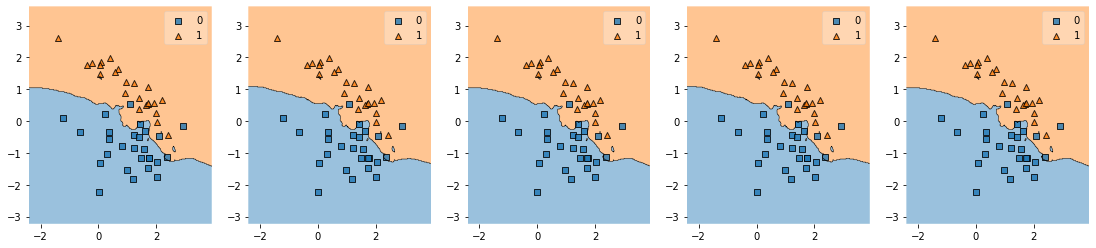

In [140]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 5)

ax = []
shfs = ShuffleSplit(10)
sc = []
h = 39
mm = 1000000000
for i in range(0, 5):
    model = KNeighborsClassifier(n_neighbors=h,
                                 weights=lambda x: K_silv(x))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])
    scores = cross_val_score(model, X_test, Y_test, cv=shfs)
    print("Количество итераций ShuffleSplit: ", len(scores))
    print("Средняя для ShuffleSplit: {:.2f}".format(scores.mean()))
    sc.append((h, scores.mean()))
    print("На тестах: {:.2f}".format(model.score(X_test, Y_test))) 
    if scores.mean() < mm:
        mm = scores.mean()
        h += 1
    else:
        h -= 1

pos = 0
maxi = sc[0][1]
for i in range(len(sc)):
    if sc[i][1] > maxi:
        maxi=sc[i][1]
        pos=i
print("best " + str(sc[pos][0]))
plt.show()

best 10


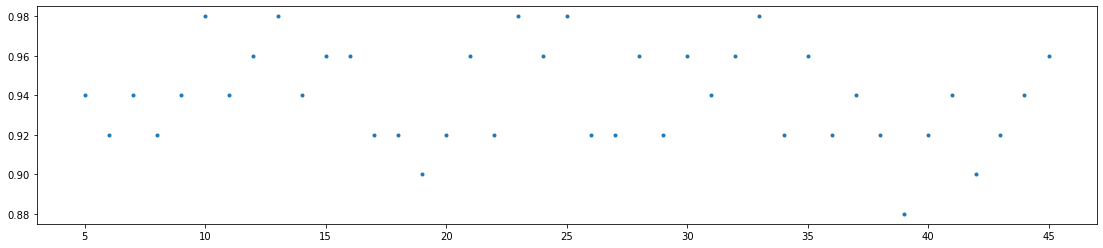

In [138]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 1)

ax = []
shfs = ShuffleSplit(10)
sc = []
h = 5
while(True):
    model = KNeighborsClassifier(n_neighbors=h,
                                 weights=lambda x: K_silv(x))
    model.fit(X_train, Y_train)
    scores = cross_val_score(model, X_test, Y_test, cv=shfs)
    sc.append((h, scores.mean())) 
    h += 1
    if h > 45:
        break

pos = 0
maxi = sc[0][1]
xs, ys = [], []
for i in range(len(sc)):
    xs.append(sc[i][0])
    ys.append(sc[i][1])
    if sc[i][1] > maxi:
        maxi=sc[i][1]
        pos=i
print("best " + str(sc[pos][0]))
ax.append(fig.add_subplot(gs[0]))
plt.plot(xs, ys, '.')
plt.show()

Количество итераций kf:  5
Средняя для kf: 0.94
На тестах: 0.92
Количество итераций kf:  5
Средняя для kf: 0.94
На тестах: 0.92
Количество итераций kf:  5
Средняя для kf: 0.94
На тестах: 0.92
Количество итераций kf:  5
Средняя для kf: 0.94
На тестах: 0.92
Количество итераций kf:  5
Средняя для kf: 0.94
На тестах: 0.92
best 39


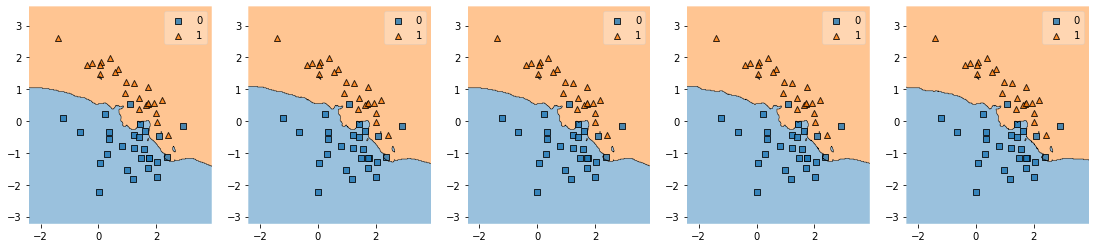

In [141]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 5)

ax = []
kf = KFold(5)
sc = []
h = 39
mm = 1000000000
for i in range(0, 5):
    model = KNeighborsClassifier(n_neighbors=h,
                                 weights=lambda x: K_silv(x))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])
    scores = cross_val_score(model, X_test, Y_test, cv=kf)
    print("Количество итераций kf: ", len(scores))
    print("Средняя для kf: {:.2f}".format(scores.mean()))
    sc.append((h, scores.mean()))
    print("На тестах: {:.2f}".format(model.score(X_test, Y_test))) 
    if scores.mean() < mm:
        mm = scores.mean()
        h += 1
    else:
        h -= 1

pos = 0
maxi = sc[0][1]
for i in range(len(sc)):
    if sc[i][1] > maxi:
        maxi=sc[i][1]
        pos=i
print("best " + str(sc[pos][0]))
plt.show()

best 12


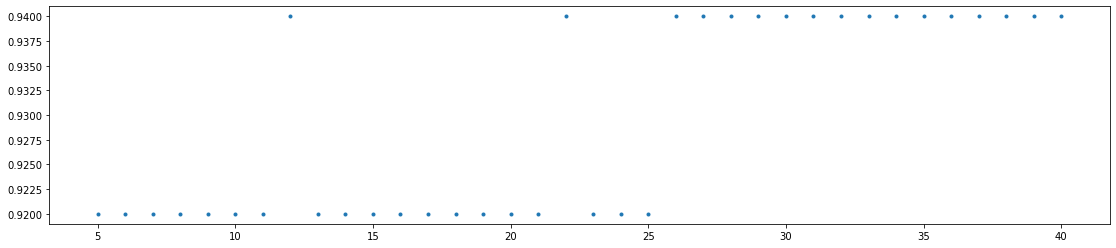

In [143]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 1)

ax = []
kf = KFold(5)
sc = []
h = 5
while(True):
    model = KNeighborsClassifier(n_neighbors=h,
                                 weights=lambda x: K_silv(x))
    model.fit(X_train, Y_train)
    scores = cross_val_score(model, X_test, Y_test, cv=kf)
    sc.append((h, scores.mean())) 
    h += 1
    if h > 40:
        break

pos = 0
maxi = sc[0][1]
xs, ys = [], []
for i in range(len(sc)):
    xs.append(sc[i][0])
    ys.append(sc[i][1])
    if sc[i][1] > maxi:
        maxi=sc[i][1]
        pos=i
print("best " + str(sc[pos][0]))
ax.append(fig.add_subplot(gs[0]))
plt.plot(xs, ys, '.')
plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.2, 1.0, 4.0]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

## Метод потенциальных функций

См. раздел ["Метод потенциальных функций"](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9) на machinelearning.ru

In [5]:
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

### Реализации метода
Релазиция данного метода в стандартных пакетах отсутствует, поэтому выполним простую реалзизацю.

In [117]:
class PFM(object):
    def __init__(self, kernel=None):
        self.X, self.Y, self.gams = None, None, None
        self.kernel = lambda x: np.ones_like(x)
        if kernel is not None:
            self.kernel = kernel
    def scores(self, X):
        features = self.gams * self.kernel(cdist(X, self.X))
        scores = np.vstack(
            [np.sum(features.T[np.where(self.Y==0)].T, axis=-1),
             np.sum(features.T[np.where(self.Y==1)].T, axis=-1)]).T
        return scores
    def predict(self, X):
        return np.argmax(self.scores(X), axis=-1)
    def fit(self, X, Y, epoch=10):
        self.X, self.Y, self.gams = np.array(X), np.array(Y), np.zeros_like(Y)
        for _ in range(epoch):
            for i, (x, y) in enumerate(zip(self.X, self.Y)):
                if self.predict(np.array([x]))[0] != y:
                    self.gams[i] += 1

In [126]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [127]:
def K_e_s(distance, k=1):
    h = np.sort(distance)[:, k][:, None]
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [128]:
def K_kv_s(distance, k=1):
    h = np.sort(distance)[:, k][:, None]
    ret = np.array(distance)/h
    return (1 - ret**2)**2 * (np.abs(ret) <= 1)

In [131]:
def K_g_s(distance, k=1):
    h = np.sort(distance)[:, k][:, None]
    ret = np.array(distance)/h
    return np.exp(-2*ret**2)

In [122]:
def K_sigm(distance, k=1):
    pi = 3.14
    h = np.sort(distance)[:, k][:, None]
    ret = np.array(distance)/h
    return 1 / (np.exp(ret) + np.exp(-ret) + 2)

In [123]:
def K_silv(distance, k=1):
    pi = 3.14
    h = np.sort(distance)[:, k][:, None]
    ret = np.array(distance)/h
    sqrt_2 = math.sqrt(2)
    ret_abs = np.abs(ret)
    return 0.5 * np.exp(-ret_abs / sqrt_2) * np.sin((ret_abs / sqrt_2) + pi / 4)

In [124]:
def K_cos(distance, k=1):
    pi = 3.14
    h = np.sort(distance)[:, k][:, None]
    ret = np.array(distance)/h
    return np.cos(pi / 2 * ret)

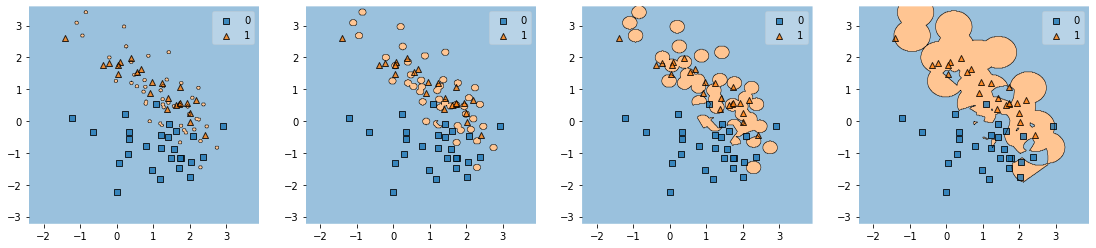

In [13]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
    model = PFM(kernel=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

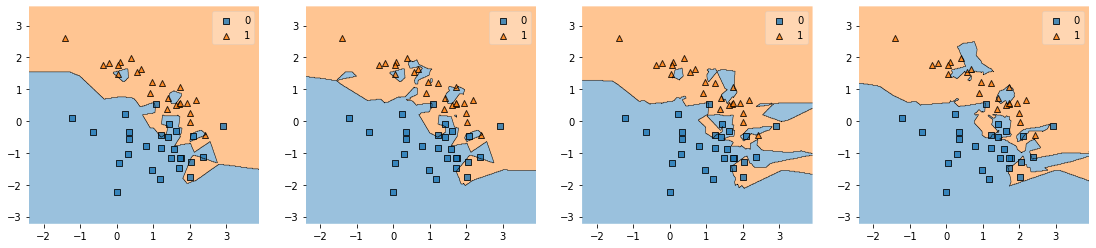

In [129]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([1, 2, 3, 4]):
    model = PFM(kernel=lambda x: K_e_s(x, k=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

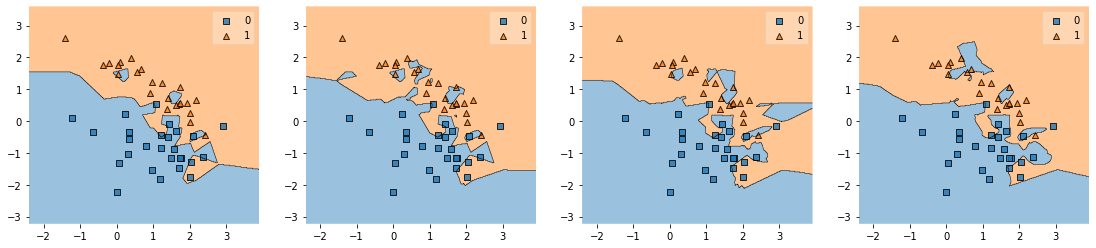

In [130]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([1, 2, 3, 4]):
    model = PFM(kernel=lambda x: K_kv_s(x, k=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

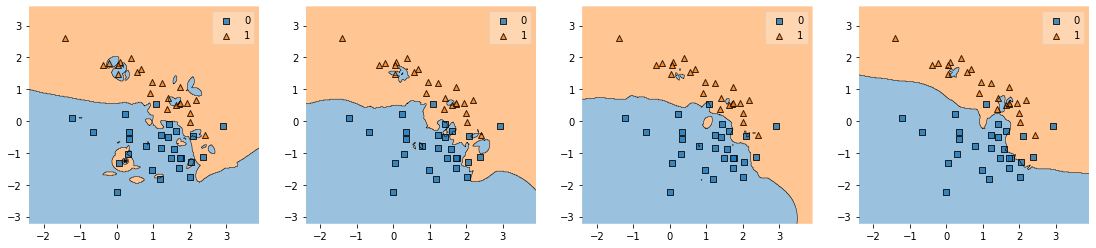

In [115]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
lpo = LeavePOut(2)
for i, h in enumerate([1, 2, 3, 4]):
    model = PFM(kernel=lambda x: K_silv(x, k=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])
plt.show()

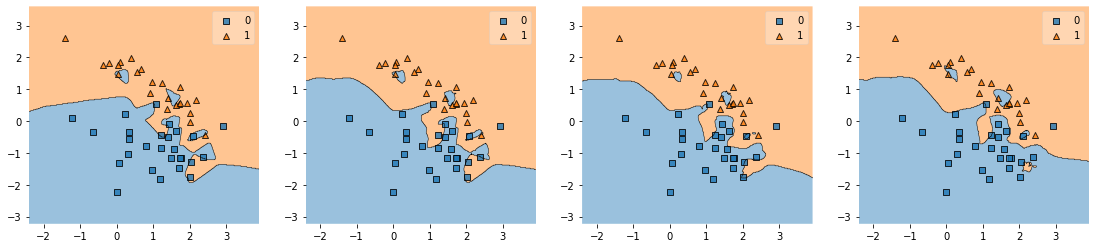

In [132]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
lpo = LeavePOut(2)
for i, h in enumerate([1, 2, 3, 4]):
    model = PFM(kernel=lambda x: K_g_s(x, k=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])
plt.show()

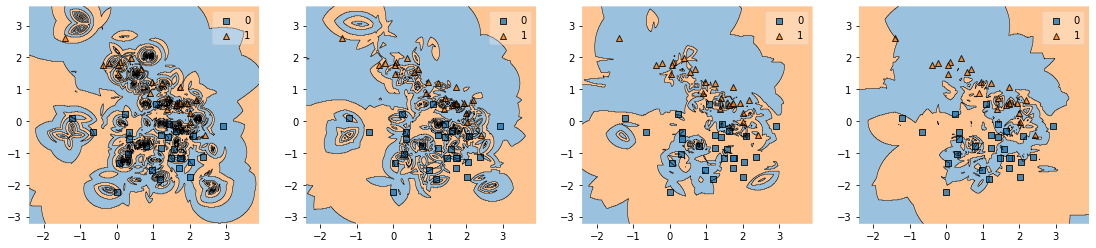

In [134]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
lpo = LeavePOut(2)
for i, h in enumerate([1, 2, 3, 4]):
    model = PFM(kernel=lambda x: K_cos(x, k=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])
plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.2, 1.0, 5.0]):
    model = PFM(kernel=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

## Отбор эталонных объектов

В данной части рассмотрим отбор эталонных объектов для метрических методов классификации.
Для начала введем понятия отступа для метрического классификатора:
$$
M\bigr(x_i\bigr) = \Gamma_{y_i}\bigr(x_i\bigr) - \max_{y\in Y\setminus{y_i}}\Gamma_{y}\bigr(x_i\bigr),
$$
другими словами, отступ показывает насколько истинный класс далеко от другого класса. В случае, если отступ положительный, то предсказание является верным. В случае, если отступ отрицательный, то предсказание является ошибочным.

In [ ]:
X, Y = make_classification(n_samples=350, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=150, 
                                                    random_state=0)

In [ ]:
def K(distance, h=0.2):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [ ]:
model = PFM(kernel=lambda x: K(x, h=2))
model.fit(X_train, Y_train)

M = [s[y]-s[y-1] for s, y in zip(model.scores(X_train), Y_train)]
M = np.array(sorted(M))

In [ ]:
x = list(range(len(M)))
plt.plot(x, M)

plt.hlines(0, 0, len(x), color='black')
plt.fill_between(x, M, where=M<0, color='red', alpha=0.5)
plt.fill_between(x, M, where=M>0, color='green', alpha=0.5)
plt.show()

### Алгоритм STOLP для отбора эталонных объектов
См. [алгоритм STOLP](http://www.machinelearning.ru/wiki/index.php?title=%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A1%D0%A2%D0%9E%D0%9B%D0%9F) на machinelearning.ru.

In [ ]:
def STOLP(X, Y, error=10, model=PFM(kernel=lambda x: K(x, h=2))):
    X, Y = np.array(X), np.array(Y)

    model.fit(X, Y)
    M = np.array([s[y] - s[y-1] for s, y in zip(model.scores(X), Y)])
    
    #filt = np.where(M > 0.1)[0]
    #X = X[filt]
    #Y = Y[filt]
    #model.fit(X, Y)
    #M = np.array([s[y] - s[y-1] for s, y in zip(model.scores(X), Y)])

    Omega = []
    Omega.append(np.argmax(M*(Y==1)))
    Omega.append(np.argmax(M*(Y==0)))
    
    while len(Omega) != len(X):
        model.fit(X[Omega], Y[Omega])
        M = np.array([s[y] - s[y-1] for s, y in zip(model.scores(X), Y)])
        M[Omega] = 10000
        if len(np.where(M <= 0)[0]) < error:
            break
        Omega.append(np.argmin(M))   
    return Omega

In [ ]:
Omega = STOLP(X_train, Y_train)
len(Omega)

In [ ]:
M = [s[y] - s[y-1] for s, y in zip(model.scores(X_train), Y_train)]
M = np.array(sorted(M))

In [ ]:
x = list(range(len(M)))
plt.plot(x, M)

plt.hlines(0, 0, len(x), color='black')
plt.fill_between(x, M, where=M<0, color='red', alpha=0.5)
plt.fill_between(x, M, where=M>0, color='green', alpha=0.5)
plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)
colors=['blue', 'orange']

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    
for k in np.unique(Y_train):
    ax[1].plot(X_train[Y_train==k, 0], 
               X_train[Y_train==k, 1], '.', color=colors[k])
    
for ind in Omega:
    ax[1].scatter([X_train[ind, 0]], 
                  [X_train[ind, 1]], color=colors[Y_train[ind]])
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])

plt.show()

## Формула Надарая-Ватсона

In [37]:
np.random.seed(0)
l = 150

# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)

# Генерация признаков
X = np.vstack([np.ones_like(x), x, np.sin(x)]).T

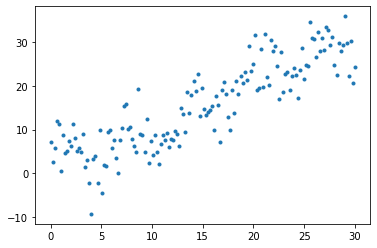

In [38]:
plt.plot(x, Y, '.')

plt.show()

In [39]:
class FNV(object):
    def __init__(self, kernel=None):
        self.X, self.Y = None, None
        self.kernel = lambda x: np.ones_like(x)
        if kernel is not None:
            self.kernel = kernel
    def predict(self, X):
        features = np.sum(self.Y*self.kernel(cdist(X, self.X)), axis=-1)
        return features/(np.sum(self.kernel(cdist(X, self.X)), axis=-1)+1e-10)
    def fit(self, X, Y):
        self.X, self.Y = np.array(X), np.array(Y)

In [40]:
def K(distance, h=0.2):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [53]:
def K_cos(distance, k=1):
    pi = 3.14
    h = np.sort(distance)[:, k][:, None]
    ret = np.array(distance)/h
    return np.cos(pi / 2 * ret)

In [76]:
def K_silv(distance, k=1):
    pi = 3.14
    h = np.sort(distance)[:, k][:, None]
    ret = np.array(distance)/h
    sqrt_2 = math.sqrt(2)
    ret_abs = np.abs(ret)
    return 0.5 * np.exp(-ret_abs / sqrt_2) * np.sin((ret_abs / sqrt_2) + pi / 4)

In [77]:
model = FNV(kernel=lambda x: K_silv(x, k=3))
model.fit(X, Y)

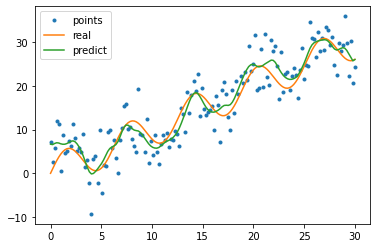

In [78]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

In [79]:
np.random.seed(0)
l = 150

# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)

# Генерация признаков
X = np.array([x]).T

In [80]:
model = FNV(kernel=lambda x: K(x, h=2))
model.fit(X, Y)

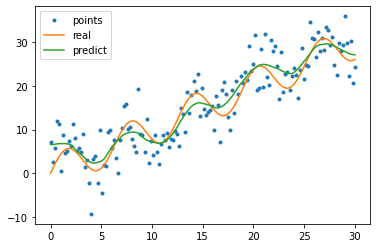

In [81]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()